In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [3]:
df = pd.read_excel("/content/Online retail.xlsx", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data=pd.get_dummies(df)

In [5]:
data

,0_almonds,0_antioxydant juice,0_asparagus,0_avocado,0_babies food,0_bacon,0_barbecue sauce,0_black tea,0_blueberries,0_body spray,...,16_antioxydant juice,16_french fries,16_frozen smoothie,17_frozen smoothie,17_protein bar,17_spinach,18_cereals,18_mayonnaise,18_spinach,19_olive oil
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
min_support = 0.01  # Adjust as needed
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.076790,(0_burgers)
1,0.013065,(0_cake)
2,0.052126,(0_chocolate)
3,0.035995,(0_cookies)
4,0.037195,(0_eggs)
...,...,...
84,0.010265,"(0_shrimp, 1_frozen vegetables)"
85,0.013332,"(1_mineral water, 0_spaghetti)"
86,0.011865,"(1_ground beef, 2_spaghetti)"
87,0.017731,"(2_mineral water, 1_spaghetti)"


In [24]:
min_confidence = 0.01  # Adjust as needed
min_lift = 1.5        # Adjust as needed

association_results = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
association_results = association_results[association_results['confidence'] >= min_confidence]

In [25]:
association_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,1.0,0.008914,1.269602,0.907656,0.159751,0.212352,0.282991
1,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,1.0,0.008914,1.425868,0.896290,0.159751,0.298673,0.282991
2,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,1.0,0.010286,1.200933,0.824803,0.135501,0.167314,0.244549
3,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,1.0,0.010286,1.303773,0.809800,0.135501,0.232995,0.244549
4,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,1.0,0.010422,1.387011,0.913837,0.185031,0.279025,0.312419
5,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,1.0,0.010422,1.411454,0.912318,0.185031,0.291511,0.312419
6,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,1.0,0.014992,1.464681,0.890004,0.203675,0.317257,0.339134
7,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,1.0,0.014992,1.404506,0.894523,0.203675,0.288006,0.339134
8,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,1.0,0.011802,1.843084,0.947513,0.250000,0.457431,0.410849
9,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,1.0,0.011802,1.483737,0.957746,0.250000,0.326026,0.410849


In [26]:
# Display association rules
for index, row in association_results.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    antecedents_list = [x for x in antecedents]
    consequents_list = [x for x in consequents]

In [28]:
# Display association rules
for index, row in association_results.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    antecedents_list = [x for x in antecedents]
    consequents_list = [x for x in consequents]
    # Display the rule
    if len(antecedents_list) == 0:
        print('Rule: No antecedents + -> ' + ', '.join(consequents_list))
    elif len(antecedents_list) == 1:
        print('Rule: ' + antecedents_list[0] + ' + -> ' + ', '.join(consequents_list))
    else:
        print('Rule: ' + ', '.join(antecedents_list) + ' + -> ' + ', '.join(consequents_list))
    # Print support, confidence, and lift
    print('Support: ' + str(row['support']))
    print("Confidence: " + str(row['confidence']))
    print('Lift: ' + str(row['lift']))
    print()  # For better readability

Rule: 0_shrimp + -> 1_frozen vegetables
Support: 0.010265297960271964
Confidence: 0.23692307692307693
Lift: 7.5947008547008545

Rule: 1_frozen vegetables + -> 0_shrimp
Support: 0.010265297960271964
Confidence: 0.32905982905982906
Lift: 7.5947008547008545

Rule: 1_mineral water + -> 0_spaghetti
Support: 0.013331555792560993
Confidence: 0.20661157024793392
Lift: 4.3779474249428025

Rule: 0_spaghetti + -> 1_mineral water
Support: 0.013331555792560993
Confidence: 0.2824858757062147
Lift: 4.3779474249428025

Rule: 1_ground beef + -> 2_spaghetti
Support: 0.011865084655379284
Confidence: 0.30584192439862545
Lift: 8.222653315104264

Rule: 2_spaghetti + -> 1_ground beef
Support: 0.011865084655379284
Confidence: 0.31899641577060933
Lift: 8.222653315104264

Rule: 2_mineral water + -> 1_spaghetti
Support: 0.01773096920410612
Confidence: 0.3546666666666667
Lift: 6.472882400648825

Rule: 1_spaghetti + -> 2_mineral water
Support: 0.01773096920410612
Confidence: 0.3236009732360097
Lift: 6.472882400648

In [30]:
# Sort the association rules by lift in descending order
association_results_sorted = association_results.sort_values('lift', ascending=False)

# Analyze the top rules with high lift and confidence
print("Top Association Rules:")
for index, row in association_results_sorted.head(10).iterrows():  # Display top 10 rules
    antecedents = row['antecedents']
    consequents = row['consequents']
    antecedents_list = [x for x in antecedents]
    consequents_list = [x for x in consequents]

    print('Rule: ' + ', '.join(antecedents_list) + ' -> ' + ', '.join(consequents_list))
    print('Support: ' + str(row['support']))
    print("Confidence: " + str(row['confidence']))
    print('Lift: ' + str(row['lift']))
    print()

# Identify frequently bought together items
print("\nFrequent Itemsets:")
for index, row in frequent_itemsets.sort_values('support', ascending=False).head(10).iterrows():
  print(f"{row['itemsets']} - Support: {row['support']}")

Top Association Rules:
Rule: 2_spaghetti -> 3_mineral water
Support: 0.012798293560858553
Confidence: 0.34408602150537637
Lift: 12.840742523939443

Rule: 3_mineral water -> 2_spaghetti
Support: 0.012798293560858553
Confidence: 0.4776119402985075
Lift: 12.840742523939443

Rule: 2_spaghetti -> 1_ground beef
Support: 0.011865084655379284
Confidence: 0.31899641577060933
Lift: 8.222653315104264

Rule: 1_ground beef -> 2_spaghetti
Support: 0.011865084655379284
Confidence: 0.30584192439862545
Lift: 8.222653315104264

Rule: 1_frozen vegetables -> 0_shrimp
Support: 0.010265297960271964
Confidence: 0.32905982905982906
Lift: 7.5947008547008545

Rule: 0_shrimp -> 1_frozen vegetables
Support: 0.010265297960271964
Confidence: 0.23692307692307693
Lift: 7.5947008547008545

Rule: 2_mineral water -> 1_spaghetti
Support: 0.01773096920410612
Confidence: 0.3546666666666667
Lift: 6.472882400648825

Rule: 1_spaghetti -> 2_mineral water
Support: 0.01773096920410612
Confidence: 0.3236009732360097
Lift: 6.47288

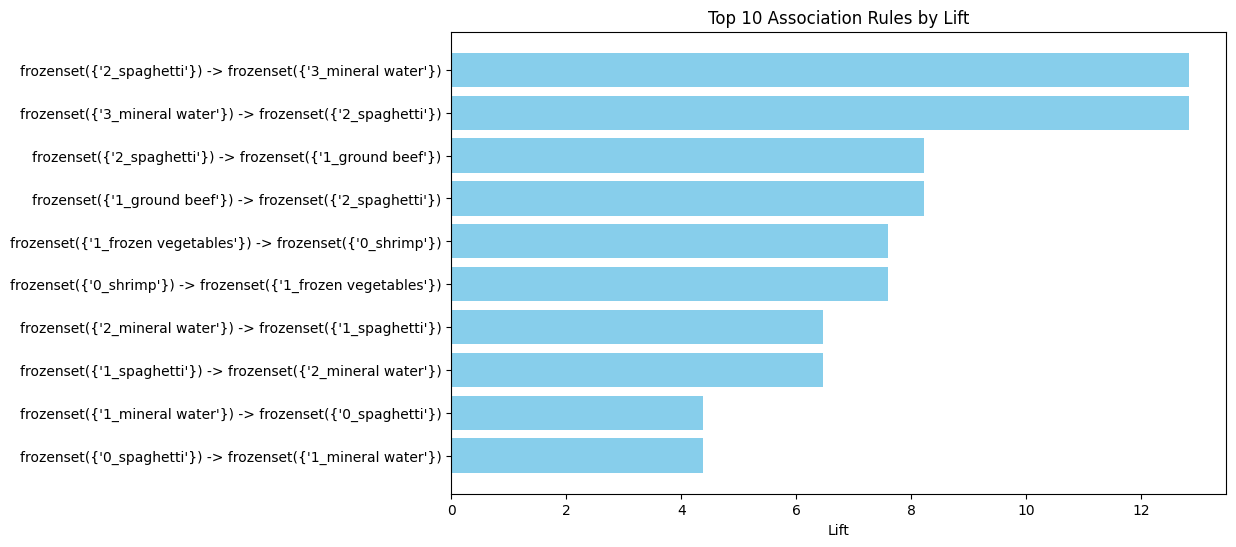

In [31]:

top_rules = association_results_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str),
         top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


In [32]:

top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)

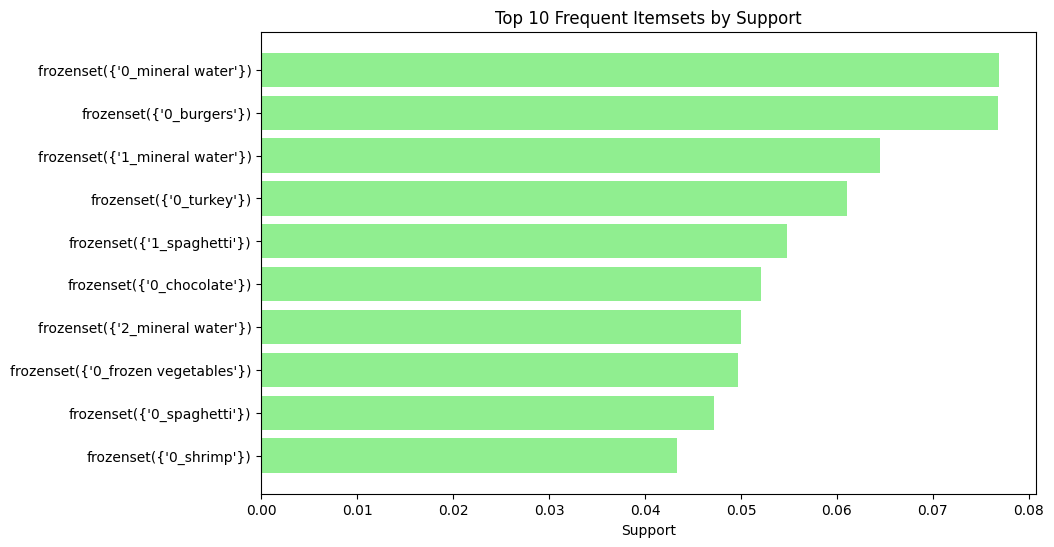

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='lightgreen')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets by Support')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

In [38]:


top_rules = association_results_sorted.head(10)

# Analyze the top rules and provide insights
print("Insights into Customer Purchasing Behavior:")
for index, row in top_rules.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    lift = row['lift']
    confidence = row['confidence']

    print(f"Rule: {antecedents} -> {consequents}")
    print(f"  Lift: {lift:.2f}")
    print(f"  Confidence: {confidence:.2f}")

    if lift > 1.5 and confidence > 0.5:  # Example thresholds, adjust as needed
        print("  Insight: Strong association. Customers who buy", antecedents, "are very likely to also buy", consequents)
    elif lift > 1 and confidence > 0.3: # Example thresholds, adjust as needed
        print("  Insight: Moderate association. Customers who buy", antecedents, "are somewhat likely to buy", consequents)
    else:
        print("  Insight: Weak association. The relationship between the items is not as strong.")

    print()

# Further analysis based on frequent itemsets
print("Insights based on frequently bought items:")
frequent_itemsets_sorted = frequent_itemsets.sort_values('support', ascending=False).head(10)
for index, row in frequent_itemsets_sorted.iterrows():
    itemset = row['itemsets']
    support = row['support']
    print(f"Itemset: {itemset} (Support: {support:.2f})")
    if support > 0.1 : # Example threshold, adjust as needed
      print(f"  Insight: This combination of items is frequently purchased together, indicating a potential product bundle or cross-selling opportunity.")

    print()


Insights into Customer Purchasing Behavior:
Rule: frozenset({'2_spaghetti'}) -> frozenset({'3_mineral water'})
  Lift: 12.84
  Confidence: 0.34
  Insight: Moderate association. Customers who buy frozenset({'2_spaghetti'}) are somewhat likely to buy frozenset({'3_mineral water'})

Rule: frozenset({'3_mineral water'}) -> frozenset({'2_spaghetti'})
  Lift: 12.84
  Confidence: 0.48
  Insight: Moderate association. Customers who buy frozenset({'3_mineral water'}) are somewhat likely to buy frozenset({'2_spaghetti'})

Rule: frozenset({'2_spaghetti'}) -> frozenset({'1_ground beef'})
  Lift: 8.22
  Confidence: 0.32
  Insight: Moderate association. Customers who buy frozenset({'2_spaghetti'}) are somewhat likely to buy frozenset({'1_ground beef'})

Rule: frozenset({'1_ground beef'}) -> frozenset({'2_spaghetti'})
  Lift: 8.22
  Confidence: 0.31
  Insight: Moderate association. Customers who buy frozenset({'1_ground beef'}) are somewhat likely to buy frozenset({'2_spaghetti'})

Rule: frozenset({'

In [39]:
# Print a summary of the generated rules
print(association_results[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

             antecedents            consequents   support  confidence  \
0             (0_shrimp)  (1_frozen vegetables)  0.010265    0.236923   
1  (1_frozen vegetables)             (0_shrimp)  0.010265    0.329060   
2      (1_mineral water)          (0_spaghetti)  0.013332    0.206612   
3          (0_spaghetti)      (1_mineral water)  0.013332    0.282486   
4        (1_ground beef)          (2_spaghetti)  0.011865    0.305842   

       lift  
0  7.594701  
1  7.594701  
2  4.377947  
3  4.377947  
4  8.222653  


In [40]:
# High Lift Rules
high_lift_rules = association_results[association_results['lift'] > 3]
print("High Lift Rules:")
print(high_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

High Lift Rules:
             antecedents            consequents   support  confidence  \
0             (0_shrimp)  (1_frozen vegetables)  0.010265    0.236923   
1  (1_frozen vegetables)             (0_shrimp)  0.010265    0.329060   
2      (1_mineral water)          (0_spaghetti)  0.013332    0.206612   
3          (0_spaghetti)      (1_mineral water)  0.013332    0.282486   
4        (1_ground beef)          (2_spaghetti)  0.011865    0.305842   
5          (2_spaghetti)        (1_ground beef)  0.011865    0.318996   
6      (2_mineral water)          (1_spaghetti)  0.017731    0.354667   
7          (1_spaghetti)      (2_mineral water)  0.017731    0.323601   
8      (3_mineral water)          (2_spaghetti)  0.012798    0.477612   
9          (2_spaghetti)      (3_mineral water)  0.012798    0.344086   

        lift  
0   7.594701  
1   7.594701  
2   4.377947  
3   4.377947  
4   8.222653  
5   8.222653  
6   6.472882  
7   6.472882  
8  12.840743  
9  12.840743  


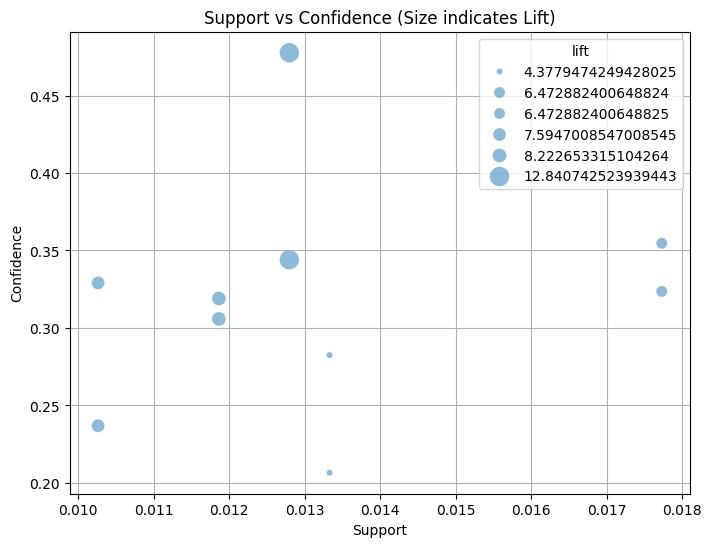

In [41]:
# Visualize Support vs Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(data=association_results, x='support', y='confidence', size='lift', sizes=(20, 200), alpha=0.5)
plt.title('Support vs Confidence (Size indicates Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid()
plt.show()

In [42]:
from collections import Counter

In [43]:
# Count items in antecedents and consequents
antecedent_items = Counter()
for antecedents in association_results['antecedents']:
    antecedent_items.update(antecedents)

consequent_items = Counter()
for consequents in association_results['consequents']:
    consequent_items.update(consequents)

# Display the most common items
print("Most Common Antecedent Items:")
print(antecedent_items.most_common(10))

print("Most Common Consequent Items:")
print(consequent_items.most_common(10))

Most Common Antecedent Items:
[('2_spaghetti', 2), ('0_shrimp', 1), ('1_frozen vegetables', 1), ('1_mineral water', 1), ('0_spaghetti', 1), ('1_ground beef', 1), ('2_mineral water', 1), ('1_spaghetti', 1), ('3_mineral water', 1)]
Most Common Consequent Items:
[('2_spaghetti', 2), ('1_frozen vegetables', 1), ('0_shrimp', 1), ('0_spaghetti', 1), ('1_mineral water', 1), ('1_ground beef', 1), ('1_spaghetti', 1), ('2_mineral water', 1), ('3_mineral water', 1)]


In [45]:
import networkx as nx

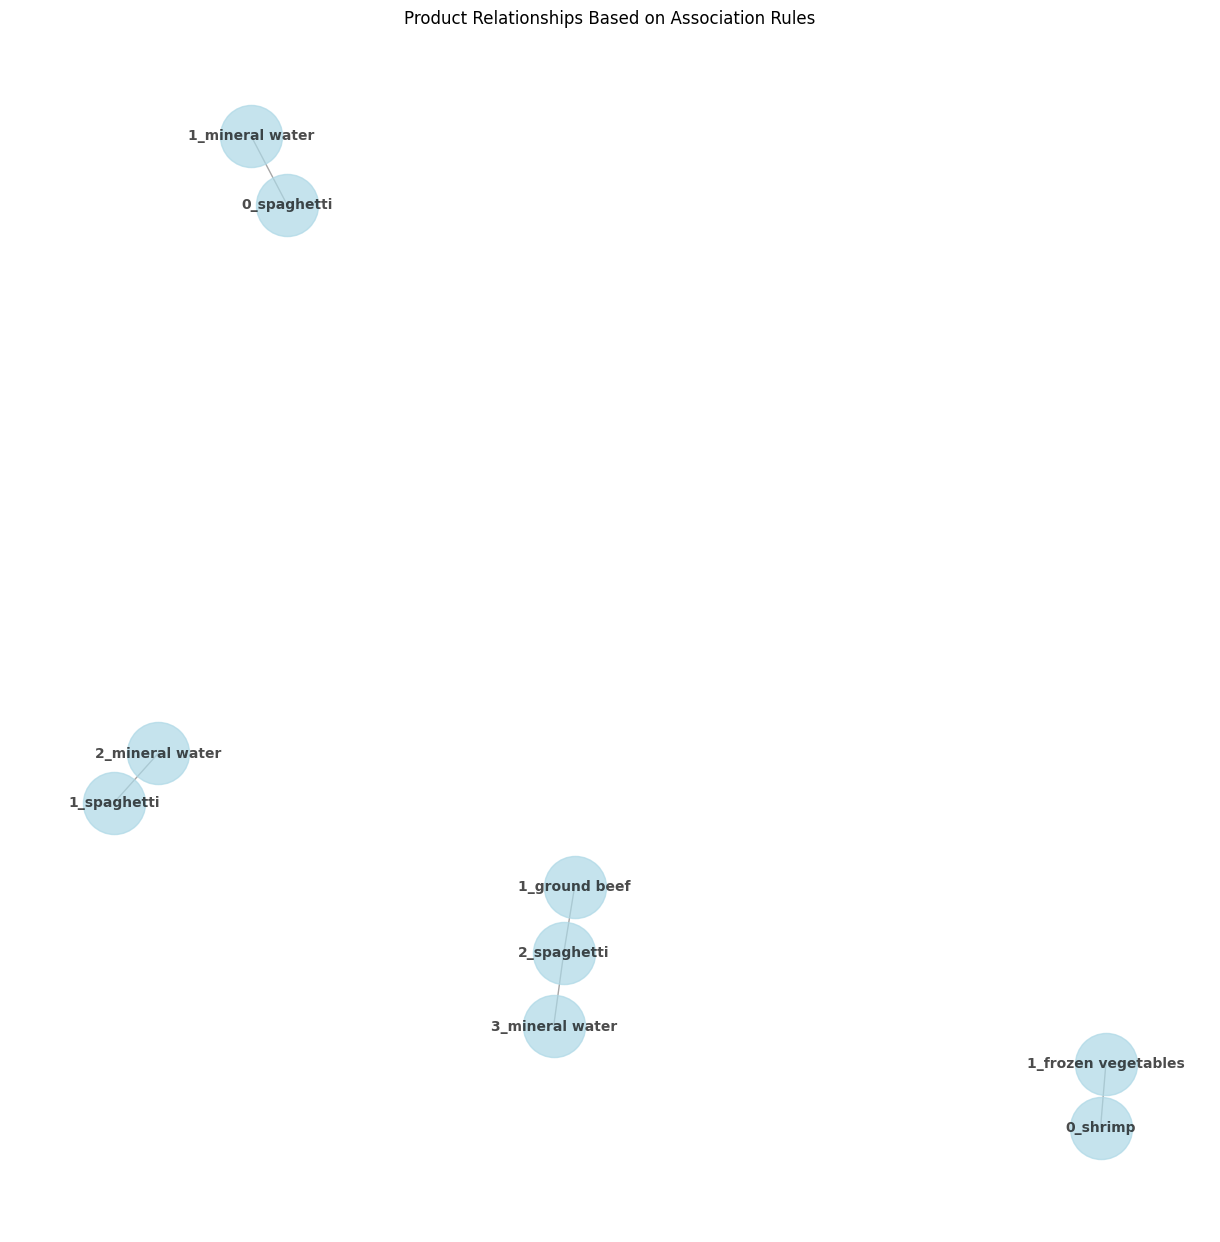

In [46]:
G = nx.Graph()
for index, row in association_results.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', alpha=0.7)
plt.title('Product Relationships Based on Association Rules')
plt.show()

# **Interview questions**

## 1. What is lift and why is it important in Association rules?

Lift in Association Rules
Lift is a measure that indicates how much more likely the consequent is to be purchased when the antecedent is also purchased, compared to when the consequent is purchased independently.

### Importance of Lift:

1. Strength of Association:
- Lift > 1 indicates a positive correlation between the antecedent and consequent.

- Lift = 1 indicates that the antecedent and consequent are independent of each other.

- Lift < 1 indicates a negative correlation (less likely to purchase consequent if antecedent is purchased).

2. Identifying Interesting Relationships:

- High lift values suggest that the association rule is not just due to chance and represents a genuinely interesting relationship between items.

3. Decision-Making for Business:

- High lift rules are helpful for identifying potential product bundling opportunities, cross-selling strategies,or product placement strategies. For example, if two products have a high lift, placing them near each other might increase sales.

## 2. What is support and Confidence. How do you calculate them?

# **Support**

Support is the proportion of transactions in the dataset that contain a specific itemset (either a single item or a set of items). It measures how frequently an itemset appears in the dataset.

### Calculation:

Support(Itemset) = (Number of transactions containing Itemset) / (Total number of transactions)

### Example:

If we have 100 transactions and 20 of them contain the itemset {Milk, Bread}, then the support for {Milk, Bread} is 20/100 = 0.2.

# **Confidence**

Confidence is a measure of how often the consequent of a rule is purchased when the antecedent is also purchased.

It shows the conditional probability of the consequent given the antecedent.

## Calculation:

Confidence(Antecedent => Consequent) = Support(Antecedent ∪ Consequent) / Support(Antecedent)

### Example:

If the support for {Milk} is 0.6 and the support for {Milk, Bread} is 0.2, then the confidence for the rule {Milk} => {Bread} is 0.2 / 0.6 = 0.33.

In our previous example, we calculated support and confidence with the following code:

for index, row in rules_sorted.head(10).iterrows(): antecedents = list(row['antecedents'])

consequents = list(row['consequents'])

support = row['support']

confidence = row['confidence']

lift = row['lift']

print(f"Rule: {antecedents} => {consequents}")

print(f"Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")

**In summary:**

Support measures the frequency of an itemset in the dataset.

Confidence measures the reliability or strength of a rule.

## 3. What are some limitations or challenges of Association rules mining?

Limitations and Challenges of Association Rule Mining:

## 1. Sparsity of Data:

- In many real-world datasets, the number of transactions is large, but the number of items in each transaction is relatively small. - This leads to sparse data, where many item combinations are not frequently purchased together, making it difficult to find meaningful association rules.

## 2. Scalability:

- As the size of the dataset grows, the computation required to find frequent itemsets and association rules can become computationally expensive. - This can be a challenge for large datasets with millions or billions of transactions.

## 3. Data Preprocessing:

- Association rule mining often requires extensive data preprocessing steps, such as handling missing values, cleaning the data, and transforming it into a suitable format. - This can be a time-consuming and challenging process, and errors in preprocessing can significantly impact the quality of the discovered rules.

## 4. Interpretation of Rules:

- The sheer number of rules generated can make it difficult to interpret and understand the underlying relationships between items. - It is crucial to have domain knowledge and expertise to filter and interpret the rules effectively and identify those that are truly valuable.

## 5. Handling Noisy Data:

- Association rule mining algorithms can be sensitive to noisy data or outliers, which can lead to the discovery of spurious or irrelevant rules. - Data cleaning and outlier detection are important steps in pre-processing to minimize the impact of noise on the results.

## 6. Selection of Parameters:

- The performance of association rule mining algorithms is highly dependent on the chosen parameters, such as the minimum support, confidence, and lift thresholds. - Selecting appropriate values for these parameters can be challenging and requires careful consideration of the specific dataset and application.

## 7. Contextual Information:

- Association rule mining often ignores contextual information, such as the time of purchase, location, customer demographics, or product category. - This can lead to the discovery of rules that are not truly relevant or actionable in a specific context.

## 8. Correlation vs. Causation:

- It is important to note that association rules only identify correlations between items, not necessarily causal relationships. - Just because two items are frequently purchased together does not necessarily mean that one causes the purchase of the other.

## 9. Interpretability of Rules with Many Items:

- When rules involve a large number of items, it can be difficult to interpret and understand the relationships between them.

**Addressing the Challenges:**

- Dimensionality reduction techniques can be used to reduce the sparsity of the data. - More efficient algorithms can be used to speed up the computation for large datasets. - Robust data preprocessing techniques can help to handle missing values and noise. - Domain knowledge and expert analysis can help to filter and interpret the rules effectively.**** **- Advanced techniques, such as incorporating contextual information, can be used to improve the relevance of the discovered rules. - Careful selection of parameters is crucial to obtain meaningful and useful rules.